# **ANNDA LAB 3 - Hopfield Networks**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## **3.1** **Convergence and attractors**

In [ ]:
def sign(X):
  return (X >= 0) * 1 + (X < 0) * -1

In [ ]:
x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])
X = np.c_[x1, x2, x3].T

In [ ]:
sign(X)

array([[-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1]])

In [ ]:
def hopfieldNet(X, scale=False, diagonalZero=False):
  M, D = X.shape
  W = np.zeros((D,D))
  for p in range(M):
    W = W + np.outer(X[p], X[p])
  
  # Self connections to 0
  if diagonalZero:
    for i in range(D):
      W[i,i] = 0
  
  if scale:
    W = W/D
  
  return W

In [ ]:
def recall(X, W, mode='batch', maxIter=10000, plot=False, returnEnergy=False,  sparse_patterns=False, theta=0):
  # We create a copy of X to not alterate it
  energies = []
  X_c = X.copy()
  try:
    X_c.shape[1]
  except:
    X_c = X_c.reshape(1, -1)
  iterations = 0
  converged = np.array_equal(X_c, sign(X_c @ W))
  
  while not converged and iterations < maxIter:
    if mode == 'batch':
      X_c = sign(X_c @ W)

    elif mode == 'seq':
      for x in X_c:
        indexes = list(range(len(x)));
        while indexes != []:
          i = random.choice(indexes)
          indexes.remove(i)
          if sparse_patterns:
            value = np.sum([W[i, j] * x[j] for j in range(len(x))])- theta
            x[i] = 0.5 + 0.5*sign(value)
          else:
            value = np.sum([W[i, j] * x[j] for j in range(len(x))])
            x[i] = sign(value)
          if returnEnergy:
            energies += [energy(x, W)]
          if i % 100 == 0 and plot:
            showPics(x)
            
 
    converged = np.array_equal(X_c, sign(X_c @ W))
    iterations += 1

  #print("Number of iterations: ", iterations)
  if returnEnergy:
    return X_c, energies
  return X_c

In [ ]:
# Let's our network was able to store our patterns
W = hopfieldNet(X)
print(np.array_equal(recall(X, W), X))

True


In [ ]:
# Noisy patterns 
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])
noisy_X = np.c_[x1d, x2d, x3d].T

In [ ]:
# Diff
print(recall(noisy_X, W, mode='batch') - X)
# Didn't converge for third pattern

[[0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Diff
print(recall(noisy_X, W, mode='seq') - X)
# In seq mode, same as batch mode

[[0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Report
rate1 = 0
rate2 = 0
rate3 = 0

for i in range(100):
  Y = recall(noisy_X, W, mode='seq') - X
  if np.array_equal(Y[0], x1):
    rate1 += 1
  if np.array_equal(Y[1], x2):
    rate2 += 1
  if np.array_equal(Y[2], x3):
    rate3 += 1

print(rate1/100)

0.0


In [ ]:
def printTheArray(arr, n):  
    v = []
    for i in range(0, n):  
        v.append(arr[i])
        X_all.append(v)
      
    print() 
  
# Function to generate all binary strings  
def generateAllBinaryStrings(n, arr, i):  
  
    if i == n: 
        printTheArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = -1
    generateAllBinaryStrings(n, arr, i + 1)  
  
    # And then assign "1" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1)  


arr = [0 for _ in range(8)]
X_all = []
generateAllBinaryStrings(8, arr, 0)

In [ ]:
def find_attractors(X_search, W, mode='batch'):
  recalled = recall(X_search, W, mode=mode)
  attractors = np.unique(recalled, axis=0)
  return attractors

In [ ]:
attractors = find_attractors(X_all, W, mode='seq')
print(f'There are {len(attractors)} attractors')

In [ ]:
print(X[0] in attractors,
X[1] in attractors,
X[2] in attractors)
# Yes all the previous patterns are attractors

In [ ]:
# What happens with more dissimilar pattern #MISSING
diss_X = np.array([])


## **3.2 Sequential training**

In [ ]:
# Let's load the pict data
pics = np.genfromtxt(f'pict.dat', delimiter=',', dtype=int).reshape(11, 1024)

In [ ]:
def showPics(pic):
  plt.imshow(pic.reshape(32,32).T)
  plt.show()


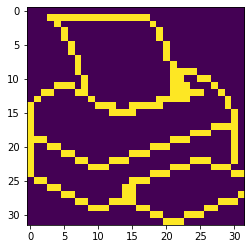

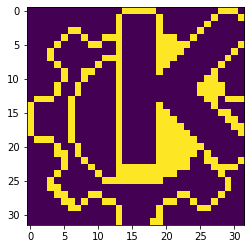

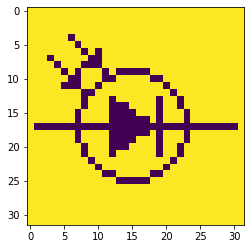

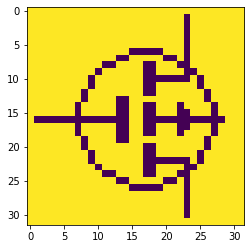

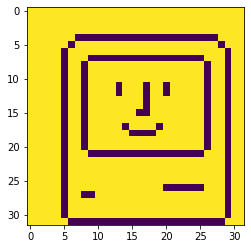

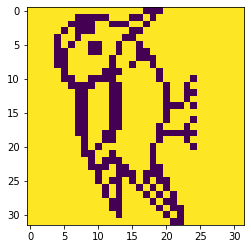

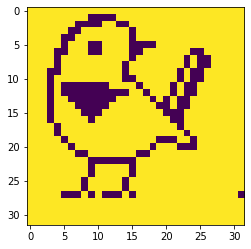

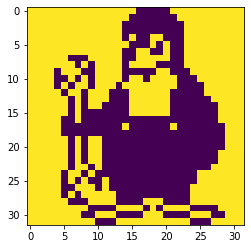

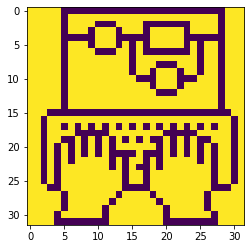

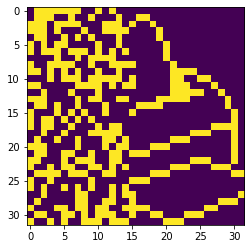

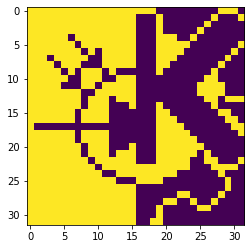

In [ ]:
for pic in pics:
  showPics(pic)

In [ ]:
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11 = pics[0], pics[1], pics[2], pics[3], pics[4], pics[5], pics[6], pics[7], pics[8], pics[9], pics[10]

In [ ]:
# Let's train on the 3 first images 
W_pics = hopfieldNet(pics[:3,:])

In [ ]:
# Checking if the first three patterns are stable
print("p1 is stable? ", np.array_equal(recall(p1, W_pics, mode='seq'), p1))
print("p2 is stable? ", np.array_equal(recall(p2, W_pics, mode='seq'), p2))
print("p3 is stable? ", np.array_equal(recall(p3, W_pics, mode='seq'), p3))
# Indeed they are 

p1 is stable?  False
p2 is stable?  False
p3 is stable?  False


In [ ]:
def diff(V):
  return len(np.where(X != 0)[1])

In [ ]:
# Complete p10 and p11 ?
result_10_11 = recall(pics[9:11,:], W_pics, mode='seq')
print("Diff between p1 and p10: ", diff(result_10_11[0] - p1))
print("Diff between p2 and p11: ", diff(result_10_11[1] - p2))
print("Diff between p3 and p11: ", diff(result_10_11[1] - p3))

Diff between p1 and p10:  24
Diff between p2 and p11:  24
Diff between p3 and p11:  24


Original


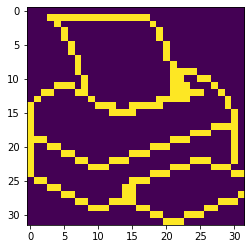

Noisy input


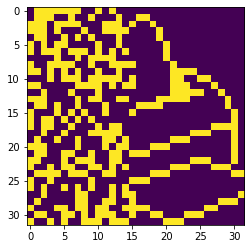

Ouput of Network


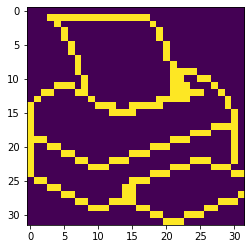

In [ ]:
print("Original")
showPics(p1)
print("Noisy input")
showPics(p10)
print("Ouput of Network")
showPics(result_10_11[0])

Originals


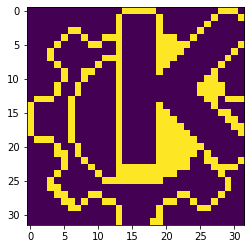

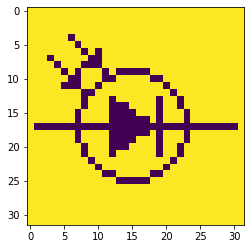

Noisy input


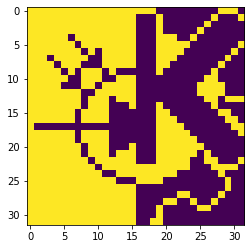

Ouput of Network


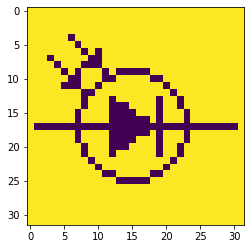

In [ ]:
print("Originals")
showPics(p2)
showPics(p3)
print("Noisy input")
showPics(p11)
print("Ouput of Network")
showPics(result_10_11[1])

In [ ]:
def generate_random_pic():
  pic = np.zeros(1024)
  for i in range(1024):
    pic[i] = random.choice([-1, 1])
  return pic


The random pic


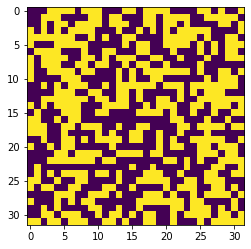

The ouput


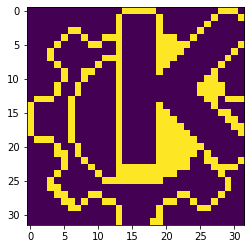

In [ ]:
# DON'T TOUUUUUUUUCH PLEASE

# let's try now with random pics
random_pic = generate_random_pic()
print("The random pic")
showPics(random_pic)

out_random_pic = recall(np.array([random_pic]), W_pics, mode='seq', maxIter=10000)
print("The ouput")
showPics(out_random_pic)

The random pic


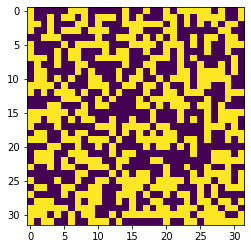

The ouput


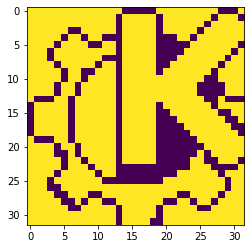

In [ ]:
# AGAAIN DON'T TOUCH

random_pic = generate_random_pic()
print("The random pic")
showPics(random_pic)

out_random_pic = recall(np.array([random_pic]), W_pics, mode='seq', maxIter=10000)
print("The ouput")
showPics(out_random_pic)

The random pic


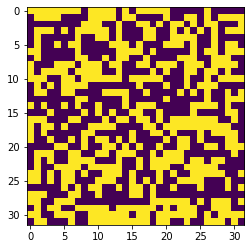

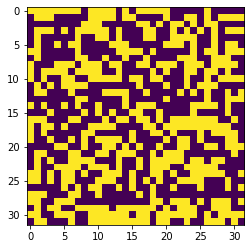

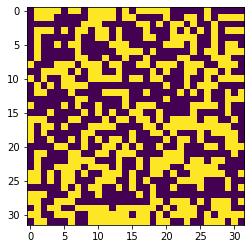

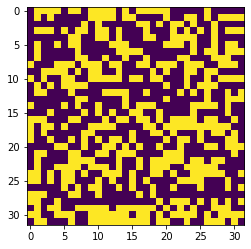

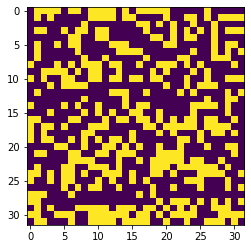

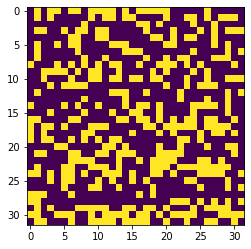

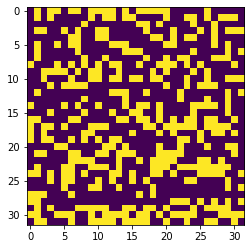

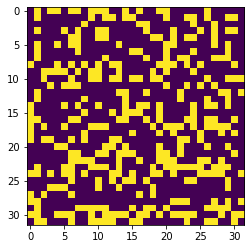

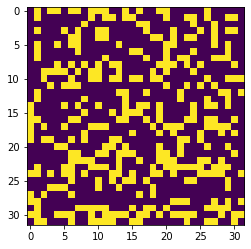

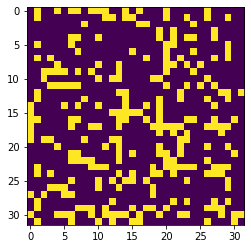

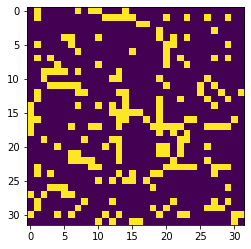

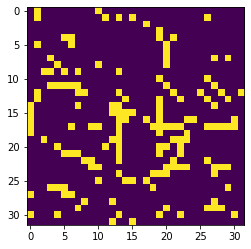

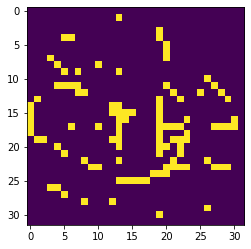

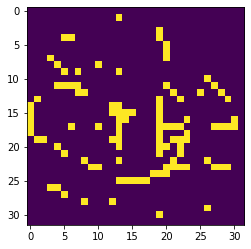

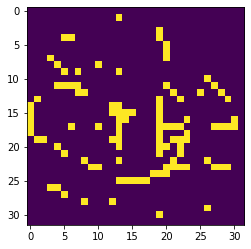

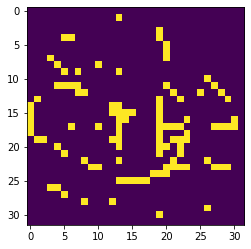

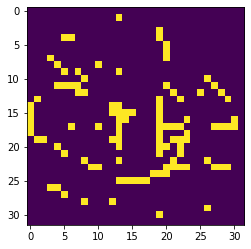

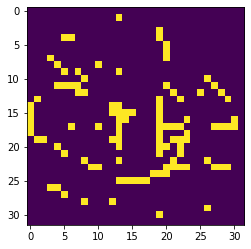

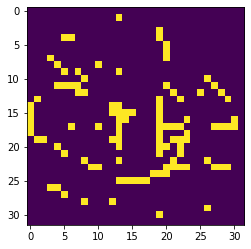

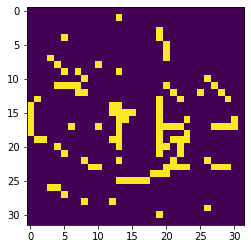

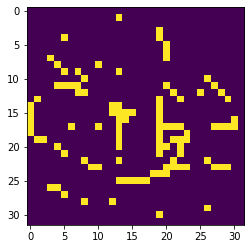

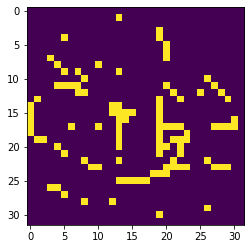

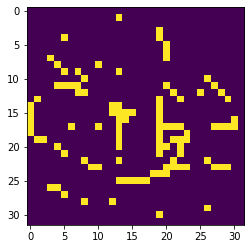

The ouput


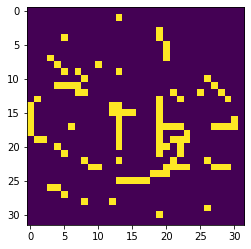

In [ ]:
# DON'T TOUUUUUUCH
# Let's now visualize the steps
random_pic = generate_random_pic()
print("The random pic")
showPics(random_pic)

out_random_pic = recall(np.array([random_pic]), W_pics, mode='seq', maxIter=10000, plot=True)
print("The ouput")
showPics(out_random_pic)

## **3.3 Energy**

In [ ]:
# Let's find the energy of our attractors
def energy(X, W):
  return - np.sum(W * np.outer(X, X.T))

In [ ]:
attractors_pics = find_attractors(pics, W_pics, mode='seq')

In [ ]:
for attractor in attractors_pics:
  for i in range(11):
    if np.array_equal(pics[i], attractor):
      print("Energy of attractor pic ", i+1, " :", energy(attractor, W_pics))

# The attractors are the first three pics, it's the pics we trained with.

Energy of attractor pic  2  : -1398416.0
Energy of attractor pic  1  : -1473936.0
Energy of attractor pic  3  : -1497344.0


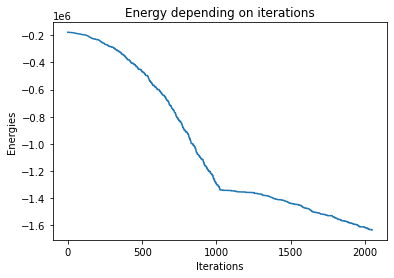

In [ ]:
_, energies = recall(np.array([p11]), W_pics, mode='seq', returnEnergy=True)

# Let's plot now
plt.plot(range(len(energies)), energies)
plt.xlabel('Iterations')
plt.ylabel('Energies')
plt.title(f'Energy depending on iterations')
plt.show()

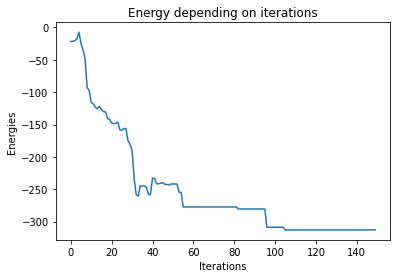

In [ ]:
# Random W
N = 50
W_random = np.random.randn(N, N)
W_random = (1 / 2) * (W_random + W_random.T)
input = np.random.randn(N)

_, energies_random = recall(np.array([input]), W_random, mode='seq', maxIter=100, returnEnergy=True)

# Let's plot now
plt.plot(range(len(energies_random)), energies_random)
plt.xlabel('Iterations')
plt.ylabel('Energies')
plt.title(f'Energy depending on iterations')
plt.show()



```
# This is formatted as code
```

## **3.4 Distorsion resistance**

0 % of noise
They're different


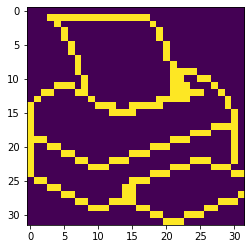

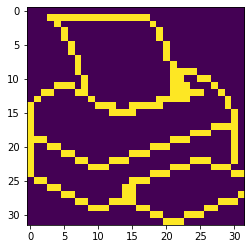

10 % of noise
They're different


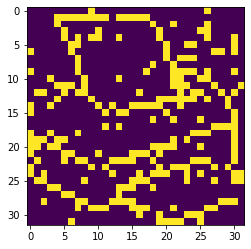

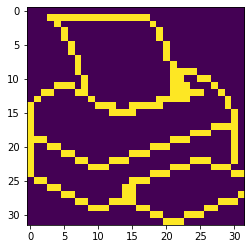

20 % of noise
They're different


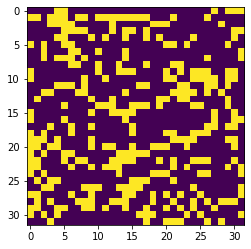

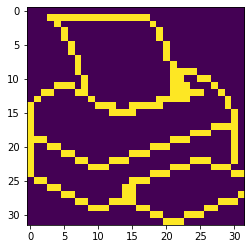

30 % of noise
They're different


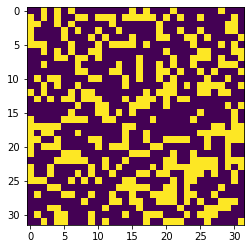

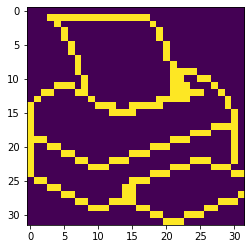

40 % of noise
They're different


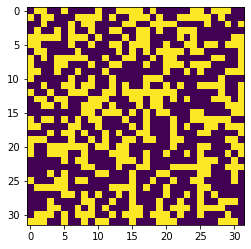

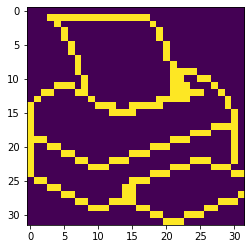

50 % of noise
They're different


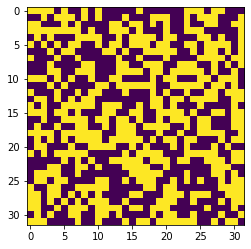

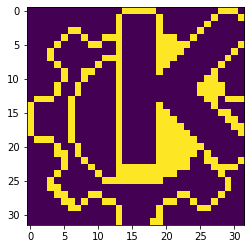

60 % of noise
They're different


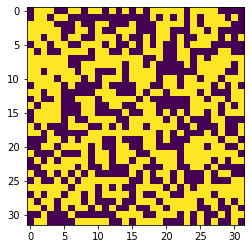

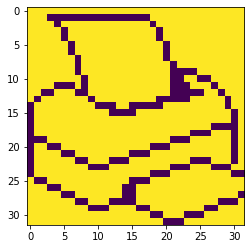

70 % of noise
They're different


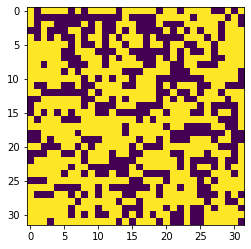

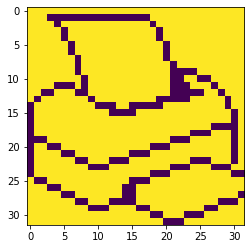

80 % of noise
They're different


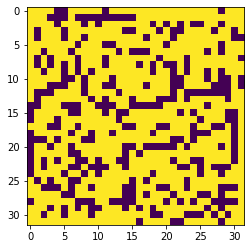

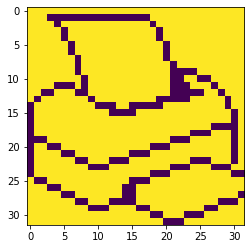

90 % of noise
They're different


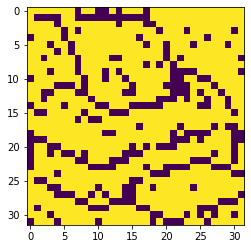

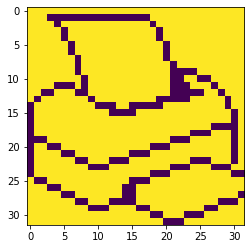

100 % of noise
They're different


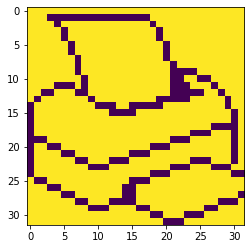

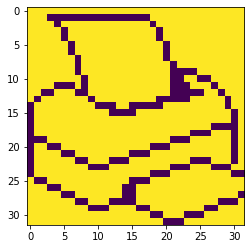

In [ ]:
p1, p2, p3 = pics[0], pics[1], pics[2]

W_pics = hopfieldNet(pics[:3,:])

def add_noise(pattern, noise_level):
  d= len(pattern)
  res=np.copy(pattern)
  random_indexes = random.sample(list(np.arange(d)), int(noise_level *d / 100))
  for index in random_indexes:
    res[index] = - pattern[index]
  return(res)


#Adding noise to P1

for i in [0,10,20,30,40,50,60,70,80,90,100]:
  p1_noise = add_noise(p1,i)
  tmp = recall(p1_noise, W_pics)
  print(i, "% of noise")
  if (np.array_equal(p1,tmp)):
    print("They're the same")
    showPics(p1_noise)
    showPics(tmp)
  else :
    print("They're different")
    showPics(p1_noise)
    showPics(tmp)


Text(0.5, 1.0, 'Error depending on noise (Batch mode)')

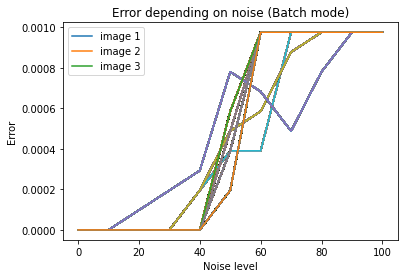

In [ ]:
def error_noise(pattern):
  error = [0,0,0,0,0,0,0,0,0,0,0]
  pattern_copy =  np.array(pattern, copy=True) 
  for a in range(10):
    for i in [0,10,20,30,40,50,60,70,80,90,100]:
      pattern_noise = add_noise(pattern_copy,i)
      tmp = recall(pattern_noise, W_pics)
      error_tmp = 1*(tmp != pattern_copy)
      #print(sum(error_tmp))
      error_tmp =  sum(error_tmp)/(pattern_noise.shape[0]*10)
      error[int(i/10)] = error[int(i/10)] + error_tmp
  return error

error1 = error_noise(p1)
error2 = error_noise(p2)
error3 = error_noise(p3)
plt.plot([10*i for i in range(11)], error1)
plt.plot([10*i for i in range(11)], error2)
plt.plot([10*i for i in range(11)], error3)
plt.xlabel('Noise level')
plt.ylabel('Error')
plt.legend(["image 1", "image 2", "image 3"])
plt.title(f'Error depending on noise (Batch mode)')

Text(0.5, 1.0, 'Probability to converge to the right attractor depending on noise (batch mode)')

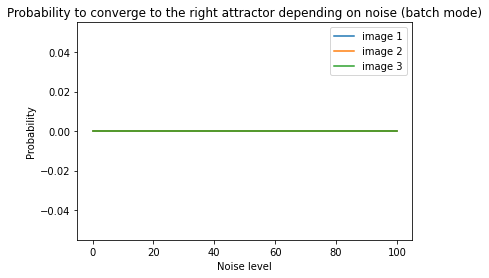

In [ ]:
def proba_conver(pattern):
  prob = [0,0,0,0,0,0,0,0,0,0,0]
  pattern_copy =  np.array(pattern, copy=True) 
  for i in [0,10,20,30,40,50,60,70,80,90,100]:
    for a in range(100):
      pattern_noise = add_noise(pattern_copy,i)
      tmp = recall(pattern_noise, W_pics)
      if np.array_equal(tmp, pattern):
        prob[int(i/10)] += 1/100
  return prob

error1 = proba_conver(p1)
error2 = proba_conver(p2)
error3 = proba_conver(p3)
plt.plot([10*i for i in range(11)], error1)
plt.plot([10*i for i in range(11)], error2)
plt.plot([10*i for i in range(11)], error3)
plt.xlabel('Noise level')
plt.ylabel('Probability')
plt.legend(["image 1", "image 2", "image 3"])
plt.title(f'Probability to converge to the right attractor depending on noise (batch mode)')

**3.5  Capacity**

In [ ]:
def error(image1, image2):
  return np.sum((image1 != image2)) / len(image2.flatten())

pic0_errors=[]
sum_pics_errors = []
for i in range(2,8):
    W_pics_extended = hopfieldNet(pics[:i,:])
    pic0_errors.append(error(recall(pics[0], W_pics_extended, mode='seq'),pics[0]))
    s = 0
    for k in range(i):
        s += error(recall(pics[k], W_pics_extended, mode='seq'),pics[k])
    sum_pics_errors.append(s/i)
    print(s)

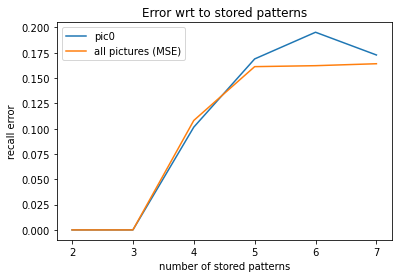

In [ ]:
i_s = np.array(range(2,8))
plt.plot(i_s, pic0_errors)
plt.plot(i_s, sum_pics_errors)
plt.xlabel("number of stored patterns")
plt.ylabel("recall error")
plt.title("Error wrt to stored patterns")
plt.legend(["pic0", "all pictures (MSE)"])
plt.savefig("3_5__0.png")


In [ ]:
random_pics = np.array([generate_random_pic() for _ in range(140)])
# np.shape(random_pics)
sum_random_pics_errors = []
for i in range(2,106):
    W_pics_extended = hopfieldNet(random_pics[:i,:])
    s = 0
    for k in range(i):
        s += error(recall(random_pics[k], W_pics_extended, mode='seq'),random_pics[k])
    sum_random_pics_errors.append(s/i)

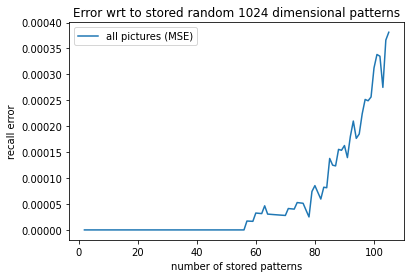

In [ ]:
i_s = np.array(range(2,106))
plt.plot(i_s, sum_random_pics_errors)
plt.xlabel("number of stored patterns")
plt.ylabel("recall error")
plt.title("Error wrt to stored random 1024 dimensional patterns")
plt.legend(["all pictures (MSE)"])
plt.savefig("3_5__1.png")

In [ ]:
def generate_random_pic2():
  pic = np.zeros(100)
  for i in range(100):
    pic[i] = random.choice([-1, 1])
  return pic
random_pics2 = np.array([generate_random_pic2() for _ in range(300)])
mse_random_pics_errors2 = []
sum_random_pics_errors2 = []
for i in range(2,300, 10):
    W_pics_extended = hopfieldNet(random_pics2[:i,:])
    s = 0
    for k in range(i):
        s += error(recall(random_pics2[k], W_pics_extended, mode='seq'),random_pics2[k])
    sum_random_pics_errors2.append(s)
    mse_random_pics_errors2.append(s/i)
    # if (i%10==0):
    print("i = ", i, " s/i = ", s)

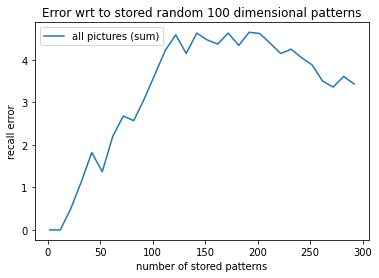

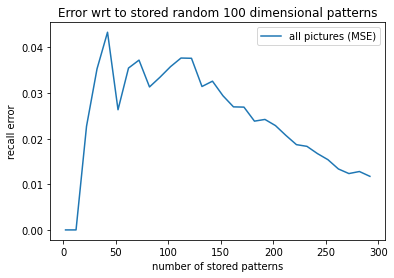

In [ ]:
# len(sum_random_pics_errors2)
i_s = np.array( range(2,300, 10))
plt.plot(i_s, sum_random_pics_errors2)
plt.xlabel("number of stored patterns")
plt.ylabel("recall error")
plt.title("Error wrt to stored random 100 dimensional patterns")
plt.legend(["all pictures (sum)"])
plt.savefig("3_5__2.png")
plt.figure()
i_s = np.array( range(2,300, 10))
plt.plot(i_s, mse_random_pics_errors2)
plt.xlabel("number of stored patterns")
plt.ylabel("recall error")
plt.title("Error wrt to stored random 100 dimensional patterns")
plt.legend(["all pictures (MSE)"])
plt.savefig("3_5__3.png")

In [ ]:
def generate_random_pic2():
  pic = np.zeros(100)
  for i in range(100):
    pic[i] = np.sign(0.5 + random.uniform(-1,1))
  return pic

random_pics2 = np.array([generate_random_pic2() for _ in range(300)])
mse_random_pics_errors2 = []
sum_random_pics_errors2 = []
for i in range(2,50, 2):
    W_pics_extended = hopfieldNet(random_pics2[:i,:])
    s = 0
    for k in range(i):
        s += error(recall(random_pics2[k], W_pics_extended, mode='seq'),random_pics2[k])
    sum_random_pics_errors2.append(s)
    mse_random_pics_errors2.append(s/i)
    # if (i%10==0):
    print("i = ", i, " s/i = ", s/i)

i =  2  s/i =  0.0
i =  4  s/i =  0.0
i =  6  s/i =  0.18166666666666667
i =  8  s/i =  0.22499999999999998
i =  10  s/i =  0.23199999999999998
i =  12  s/i =  0.23416666666666663
i =  14  s/i =  0.23214285714285715
i =  16  s/i =  0.23562500000000003
i =  18  s/i =  0.22999999999999998
i =  20  s/i =  0.22850000000000006
i =  22  s/i =  0.22681818181818192
i =  24  s/i =  0.22750000000000006
i =  26  s/i =  0.22884615384615392
i =  28  s/i =  0.22821428571428573
i =  30  s/i =  0.23800000000000007
i =  32  s/i =  0.23531250000000004
i =  34  s/i =  0.23500000000000004
i =  36  s/i =  0.23555555555555557
i =  38  s/i =  0.23736842105263156
i =  40  s/i =  0.24100000000000002
i =  42  s/i =  0.24166666666666667
i =  44  s/i =  0.23931818181818185
i =  46  s/i =  0.24043478260869566
i =  48  s/i =  0.239375


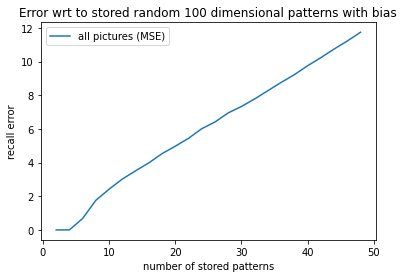

In [ ]:
i_s = np.array(range(2,50, 2))
plt.plot(i_s, sum_random_pics_errors2)
plt.xlabel("number of stored patterns")
plt.ylabel("recall error")
plt.title("Error wrt to stored random 100 dimensional patterns with bias")
plt.legend(["all pictures (MSE)"])
plt.savefig("3_5__4.png")

In [ ]:
W_pics_extended

array([[48., 18., 16., ...,  6.,  0.,  0.],
       [18., 48., 22., ...,  8., 10., 10.],
       [16., 22., 48., ..., 10., 12.,  0.],
       ...,
       [ 6.,  8., 10., ..., 48.,  6., 18.],
       [ 0., 10., 12., ...,  6., 48.,  4.],
       [ 0., 10.,  0., ..., 18.,  4., 48.]])

## **3.6** **Sparse Patterns**

In [ ]:
def hopfield_sparse(X):
  P, N = X.shape  
  W = np.zeros([N, N])
  average_activity = 1 / (P * N) * sum(sum(X))
  for i in range(P):
    x_i = (X[i, :] - average_activity)
    W += np.outer(x_i.T, x_i)
  return W
  
def generate_data(N, P=1, activity=0.1):
    positions = np.arange(0, N * P)
    np.random.shuffle(positions)
    data = np.zeros(N * P)
    for i in range(round(activity * (N * P))):
        data[positions[i]] = 1
    return np.array(data).reshape(-1, N)

differences = lambda x: len(np.where(x != 0)[1])

def addToscores(list1, list2):
  newlist = []
  for score1, score2 in zip(list1, list2):
    sumlist = (np.array(score1) + np.array(score2)).tolist()
    newlist.append(sumlist)
  return newlist

P = 10
theta_range = np.arange(0, 4, 0.5)
average_scores = [[0 for i in range(10)] for j in range(7)]
for s in range(10):
  scores = []
  print(s)
  for indexe, theta in enumerate(theta_range):
    X = generate_data(100, 10) 
    score_theta = []
    for i in range(1,P+1):
      n_stored = 0
      W_sparse = hopfield_sparse(X[:i,:])
      for j in range(i):
        pred = recall(X[j,:], W_sparse, sparse_patterns=True, theta=theta, maxIter=10, mode='seq')
        diff = differences(pred - X[j,:])
        if diff == 0:
          n_stored += 1
      score_theta += [n_stored/i]
    scores += [score_theta]   
  average_scores = addToscores(average_scores, scores)    

In [ ]:
plt.plot(range(1,11), [i/10 for i in average_scores[0]])
plt.plot(range(1,11), [i/10 for i in average_scores[1]])
plt.plot(range(1,11), [i/10 for i in average_scores[2]])
plt.plot(range(1,11), [i/10 for i in average_scores[3]])
plt.plot(range(1,11), [i/10 for i in average_scores[4]])
plt.plot(range(1,11), [i/10 for i in average_scores[5]])
plt.plot(range(1,11), [i/10 for i in average_scores[6]])
plt.legend(["theta: {}".format(round(theta,2)) for theta in theta_range])
plt.xlabel("number of patterns")
plt.ylabel("percentage of stored pattern")
plt.title("genreating sparse patterns with 5%")

In [ ]:
P = 10
theta_range = np.arange(0, 4, 0.5)
average_scores = [[0 for i in range(10)] for j in range(7)]
for s in range(10):
  scores = []
  for indexe, theta in enumerate(theta_range):
    X = generate_data(100, 10, activity=0.05) 
    score_theta = []
    for i in range(1,P+1):
      n_stored = 0
      W_sparse = hopfield_sparse(X[:i,:])
      for j in range(i):
        pred = recall(X[j,:], W_sparse, sparse_patterns=True, theta=theta, maxIter=10, mode='seq')
        diff = differences(pred - X[j,:])
        if diff == 0:
          n_stored += 1
      score_theta += [n_stored/i]
    scores += [score_theta]   
  average_scores = addToscores(average_scores, scores)  

In [ ]:
plt.plot(range(1,11), [i/10 for i in average_scores[0]])
plt.plot(range(1,11), [i/10 for i in average_scores[1]])
plt.plot(range(1,11), [i/10 for i in average_scores[2]])
plt.plot(range(1,11), [i/10 for i in average_scores[3]])
plt.plot(range(1,11), [i/10 for i in average_scores[4]])
plt.plot(range(1,11), [i/10 for i in average_scores[5]])
plt.plot(range(1,11), [i/10 for i in average_scores[6]])
plt.legend(["theta: {}".format(round(theta,2)) for theta in theta_range])
plt.xlabel("number of patterns")
plt.ylabel("percentage of stored pattern")
plt.title("genreating sparse patterns with 5%")